# Install the Necessary Libraries

Name : Pratik Yuvraj Yawalkar

Roll No.  : AI23MTECH11006

Department : AI & ML

In [1]:
!pip install astroML numpy pandas scipy matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 1.5 MB/s eta 0:00:00


# 1. In the class, we demonstrated the Central Limit Theorem for a sample drawn from a uniform distribution. Reproduce a similar plot for a sample drawn the from chi-square distribution with degrees of freedom equal to 3, for samples drawn once, 5 times, and 10 times. Either plot all of these on one multipanel figure similar to AstroML figure 3.20. (Hint: look up numpy.random.chisquare and show the distribution of x from 0 to 10)




In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def first_plot(sample_size: int =1)->None:

    np.random.seed(42)  # Set the seed to draw the random samples
    df = 3              # Define the degrees of freedom for the chi-square distribution


    # Generate and plot samples for given Sample Size
    # Draw samples from the chi-square distribution
    samples = np.random.chisquare(df, size=(sample_size, 10000))

    # Calculate sample means
    sample_means = np.mean(samples, axis=0)

    # Plot the Required Figures
    sns.histplot(sample_means, kde=True, bins=50,  label=f'Sample Size = {sample_size}', color='C'+str(sample_size))
    plt.legend()
    plt.title(f'Distribution of Sample Means (Chi-square with df={df}) for samples drawn {sample_size} times')
    plt.xlabel('Sample Mean ( Focused on x=0 to x=10 )')
    plt.ylabel('Count of the Samples ( in each bin )')
    plt.xlim(0, 10)
    plt.tight_layout()
    plt.show()


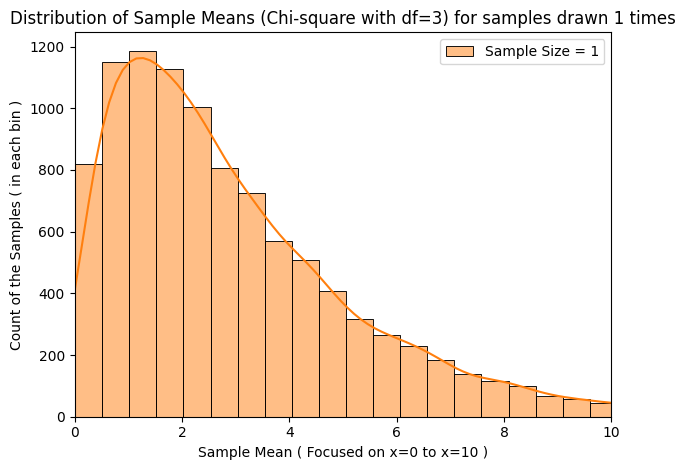

In [3]:
# Plot for samples drawn 1 times
first_plot(1)

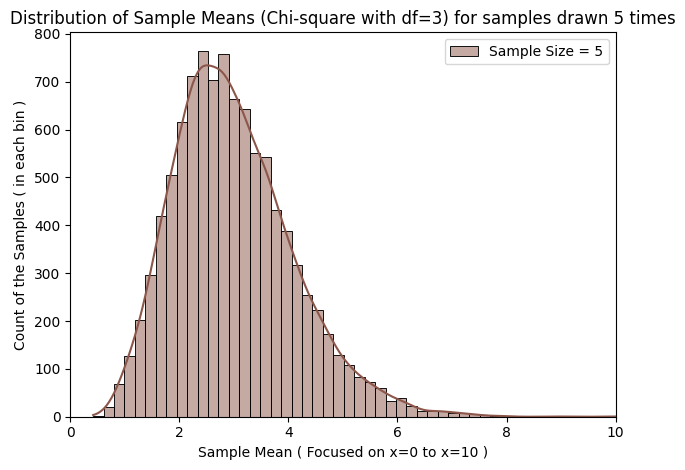

In [4]:
# Plot for samples drawn 5 times
first_plot(5)

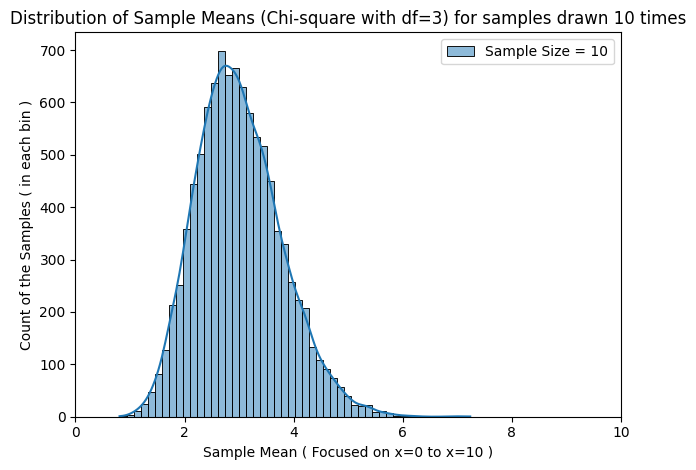

In [5]:
# Plot for samples drawn 10 times
first_plot(10)

# 2. The luminosity and redshift of galaxy clusters from XMM-BCS survey (details available at arXiv:1512.01244) can be downloaded http://www.iith.ac.in/~shantanud/test.dat. Plot the luminosity as a function of redshift on a log-log scale. By eye, do you think the datasets are correlated? Calculate the Spearman, Pearson and Kendall-tau correlation coefficients and the p-value for the null hypothesis.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr, kendalltau

def second_plot()->None:

    # Load the data Stored on Local Machine in same folder
    data = pd.read_csv('galaxy_cluster_data.txt', sep='\s+', header=None, names=['luminosity', 'redshift'])

    # Droped the first row in the dataset as we have loaded the
    # dataset with different column names
    data = data.drop([0])

    # Convert columns to numeric (if needed)
    # I am getting TypeError: unsupported operand type(s) for +: 'float' and 'str'
    # Hence I have used below function
    data['luminosity'] = pd.to_numeric(data['luminosity'], errors='coerce')
    data['redshift'] = pd.to_numeric(data['redshift'], errors='coerce')

    # Ploting the luminosity as a function of redshift on a log-log scale
    plt.scatter(x=data['redshift'], y=data['luminosity'], alpha=0.5, c='C2', marker='x')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Redshift (log scale)')
    plt.ylabel('Luminosity (log scale)')
    plt.title(' Redshift Vs Luminosity ')
    plt.show()

    # Calculate correlation coefficients and p-values
    spearman_corr, spearman_p_value = spearmanr(data['redshift'], data['luminosity'])
    pearson_corr, pearson_p_value = pearsonr(data['redshift'], data['luminosity'])
    kendall_corr, kendall_p_value = kendalltau(data['redshift'], data['luminosity'])

    # Print the results
    print(f"\n\nSpearman correlation coefficient: {spearman_corr:.4f},   Spearman p-value: {spearman_p_value:.4f}")
    print(f"\n\nPearson correlation coefficient: {pearson_corr:.4f},   Pearson p-value: {pearson_p_value:.4f}")
    print(f"\n\nKendall Tau correlation coefficient: {kendall_corr:.4f},   Kendall Tau p-value: {kendall_p_value:.4f}")


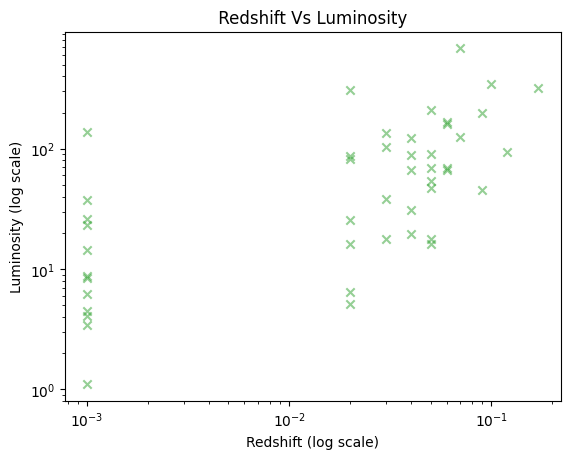



Spearman correlation coefficient: 0.6596,   Spearman p-value: 0.0000


Pearson correlation coefficient: 0.5144,   Pearson p-value: 0.0003


Kendall Tau correlation coefficient: 0.5030,   Kendall Tau p-value: 0.0000


In [7]:
# Call the function to display plot
second_plot()

# Before calculating the correlation coefficient, We observe
# that there is a Linear-Positive Relationship among Redshift and Luminosity

# 3. Wind speed data from the Swiss Wind Power data website can be found at http://wind-data.ch/tools/weibull.php. Using the data provided on the website, plot the probability distribution and overlay the best-fit Weibull distribution (with the parameters shown on the website). (20 points) (Hint : A on the website is same as λ, which was used in class to parameterize the Weibull distribution.)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

def third_plot()->None:
    # Load the data Stored on Local Machine in same folder
    data = pd.read_csv('wind_data.txt', sep='\t', header=None, names=['Class', 'Frequency in %'])

    # Droped the first row in the dataset as we have loaded the
    # dataset with different column names
    data = data.drop([0])

    # Convert columns to numeric (if needed)
    # TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could
    # not be safely coerced to any supported types according to the casting rule ''safe''
    # Hence I have used below function
    data['Class'] = pd.to_numeric(data['Class'], errors='coerce')
    data['Frequency in %'] = pd.to_numeric(data['Frequency in %'], errors='coerce')


    # Weibull distribution parameters (replace these with the actual parameters)
    shape = 2.0  # shape parameter (c or k)
    scale = 6.0  # scale parameter (λ or c)
    location = 0.0  # location parameter (δ)

    # Plot the data in the histogram for the % frequencies
    plt.bar(data['Class'], data['Frequency in %'], label='Data', color='C4')

    # Overlay the Weibull distribution
    x = np.linspace(0, max(data['Class']), 100)
    y_fit = weibull_min.pdf(x, shape, loc=location, scale=scale)
    plt.plot(x, y_fit * 100, 'C12', label='Weibull Distribution Fit')

    plt.xlabel('Wind Speed ( Class )')
    plt.ylabel('Frequency in %')
    plt.title('Wind-Speed Frequency Distribution along with Weibull Fit')
    plt.legend()
    plt.show()


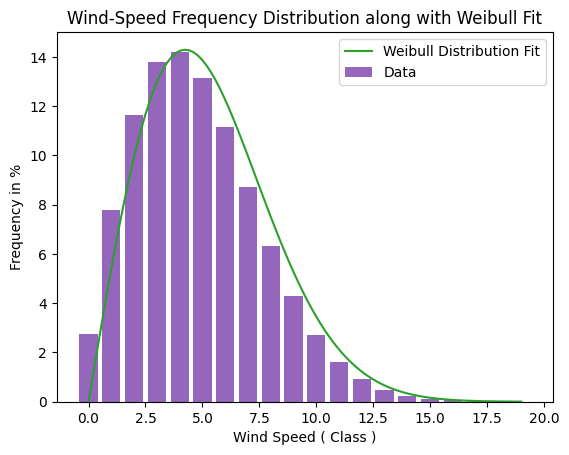

In [9]:
# Call the function to display plot
third_plot()

# 4. Generate two arrays of size 1000 drawn from a Gaussian distribution of mean of zero and standard deviation of one. Calculate Pearson correlation coefficient and its p−value using scipy module. Also check if the p− value agrees with that calculated using the Student-t distibution.

In [10]:
import numpy as np
from scipy.stats import pearsonr, t

def fourth_plot(t_dis_tail: int=2)->None:

    np.random.seed(42)  # Set the seed to draw the random samples

    # Generate two Numpy arrays of size 1000 drawn from a Gaussian distribution
    gaussian_generated_one = np.random.normal(0, 1, 1000)
    gaussian_generated_two = np.random.normal(0, 1, 1000)

    # Calculate Pearson correlation coefficient and its p-value
    correlation_pearson, pearson_p_value = pearsonr(gaussian_generated_one, gaussian_generated_two)

    # Degrees of freedom for the Student-t distribution
    df = len(gaussian_generated_one) - 2  # for Pearson correlation

    # Calculate p-value using the Student-t distribution
    t_distribution_p_value = t_dis_tail * (1 - t.cdf(np.abs(correlation_pearson) * np.sqrt(df) / np.sqrt(1 - correlation_pearson**2), df))

    print(f"\n\nPearson correlation coefficient: {correlation_pearson:.4f}")
    print(f"\n\nP-value using scipy.stats.pearsonr: {pearson_p_value:.4f}")
    print(f"\n\nP-value using Student-t distribution: {t_distribution_p_value:.4f}")

    # check if the p−value agrees with that calculated using the Student-t distibution.
    if np.isclose(pearson_p_value, t_distribution_p_value, rtol=1e-4):
        print("\n\nP-values agree.")
    else:
        print("\n\nP-values do not agree.")


In [11]:
# Taking the t-distribution tail as 1 ( Half )
fourth_plot(t_dis_tail=1)



Pearson correlation coefficient: -0.0404


P-value using scipy.stats.pearsonr: 0.2018


P-value using Student-t distribution: 0.1009


P-values do not agree.


In [12]:
# Taking the t-distribution tail as 1 ( Half )
fourth_plot(t_dis_tail=2)



Pearson correlation coefficient: -0.0404


P-value using scipy.stats.pearsonr: 0.2018


P-value using Student-t distribution: 0.2018


P-values agree.
